In [2]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
from sklearn import datasets
plt.style.use("ggplot")
print("done")

done


In [3]:
df = pd.read_csv('train.csv')
final_test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sample_submission.csv')
print("done")

done


In [4]:
df.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,target
0,161363,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,8.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,6
1,78028,16.0,0.0,1.0,1.0,6.0,2.0,2.0,2.0,14.0,...,0.0,41.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,7
2,35324,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5
3,67966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
4,110279,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,NaN,...,0.0,0.0,1.0,5.0,4.0,0.0,0.0,0.0,1.0,5


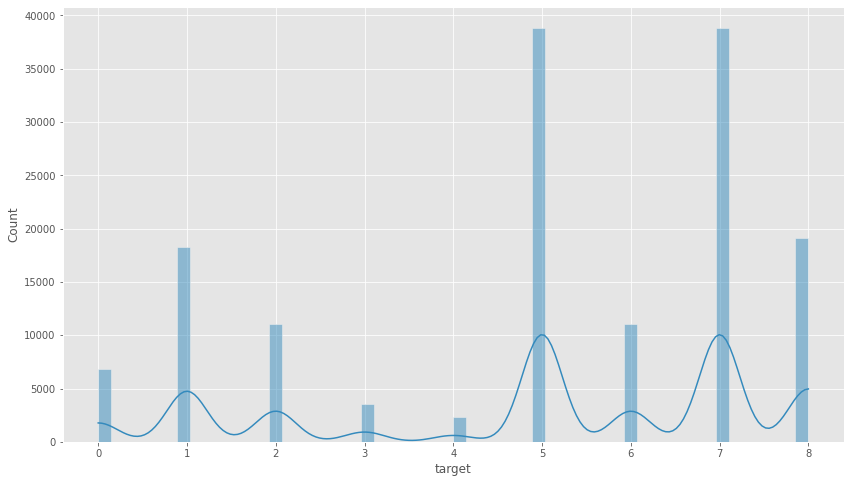

In [5]:
plt.figure(figsize=(14,8))
sns.histplot(df.target, kde=True)
plt.show()

In [4]:
X = df.drop(["id", "target"], axis=1)
y = df.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
pd.set_option('display.max_rows', 500)

In [124]:
train_df = pd.concat([X_train, y_train], axis=1)
correlation = abs(train_df.corr()["target"].sort_values(ascending=False))
correlation

target    1.000000
f_18      0.109225
f_12      0.098614
f_37      0.091127
f_16      0.091115
f_14      0.087081
f_31      0.087022
f_56      0.083190
f_53      0.082934
f_43      0.082718
f_44      0.078521
f_8       0.077783
f_65      0.065839
f_50      0.063174
f_2       0.062145
f_30      0.060896
f_1       0.060701
f_52      0.060658
f_45      0.060602
f_48      0.060213
f_3       0.059389
f_40      0.058565
f_7       0.058184
f_62      0.056302
f_72      0.056286
f_21      0.055670
f_54      0.055190
f_9       0.054638
f_4       0.053981
f_35      0.053606
f_58      0.053503
f_55      0.052959
f_13      0.051407
f_67      0.050199
f_19      0.050083
f_23      0.049936
f_70      0.049498
f_73      0.049412
f_64      0.048424
f_51      0.048145
f_25      0.047777
f_66      0.047245
f_60      0.047217
f_28      0.046377
f_46      0.044630
f_34      0.044065
f_29      0.043046
f_0       0.041229
f_38      0.041060
f_42      0.040706
f_63      0.040113
f_41      0.039773
f_32      0.

No action: 4.7253954611416855
Interpolate linear: 4.691405084847958
Impute mean: 4.704097869632694 - Use this..
Impute median: 4.7033247989275875
Impute most_frequent: 4.7029082339562125
Impute constant: 4.7029082339562125

In [25]:
train_df_inter = train_df.interpolate(method ='linear', limit_direction ='forward')
train_df_inter = train_df_inter.interpolate(method ='linear', limit_direction ='backward', limit = 1)

In [38]:
correlation_inter = abs(train_df_inter.corr()["target"].sort_values(ascending=False))
sum(correlation_inter)

4.691405084847958

In [8]:
from sklearn.impute import SimpleImputer

In [44]:
strat = ["mean", "median", "most_frequent", "constant"]

In [45]:
imp_result = []
for s in strat:
    imp = SimpleImputer(strategy=s)
    train_df_imp = imp.fit_transform(train_df)
    train_df_imp = pd.DataFrame(data=train_df_imp, columns=train_df.columns)
    correlation_imp = abs(train_df_imp.corr()["target"].sort_values(ascending=False))
    imp_result.append(sum(correlation_imp))

In [46]:
imp_result

[4.704097869632694, 4.7033247989275875, 4.7029082339562125, 4.7029082339562125]

In [9]:
imp = SimpleImputer(strategy="mean")
X_train_imp = imp.fit_transform(X_train)
X_train_imp = pd.DataFrame(data=X_train_imp, columns=X_train.columns)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polys = PolynomialFeatures(degree=2, include_bias=False)
polyfeatures = polys.fit_transform(X_train_imp)
X_train_imp_poly = pd.DataFrame(data=polyfeatures)

In [12]:
X_train_imp_poly

,0,1,2,3,4,5,6,7,8,9,...,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924
0,0.97043,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.00000,0.0,3.0,0.0,1.0,0.000000,6.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,6.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112495,0.00000,2.0,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
112496,0.00000,0.0,0.0,0.0,0.0,1.437666,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112497,0.00000,1.0,2.0,0.0,0.0,0.000000,0.0,2.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112498,1.00000,1.0,0.0,9.0,0.0,0.000000,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,22.0,0.0,484.0,0.0,0.0


In [22]:
df_train_imp_poly = pd.concat([X_train_imp_poly[:1000], y_train[:1000]], axis=1)
corr_poly = df_train_imp_poly.corr()["target"]
corr_poly.sort_values(ascending=False)

target    1.000000
911       0.923568
12        0.892753
947       0.865292
956       0.861214
            ...   
2916           NaN
2918           NaN
2921           NaN
2923           NaN
2924           NaN
Name: target, Length: 2926, dtype: float64

In [44]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
(corr_poly.sort_values(ascending=False))

target    1.000000e+00
911       9.235677e-01
12        8.927526e-01
947       8.652924e-01
956       8.612141e-01
2604      8.521580e-01
965       8.301887e-01
2606      8.297213e-01
2708      8.255603e-01
2609      8.244537e-01
2138      8.241634e-01
2305      8.230957e-01
50        8.230957e-01
2120      8.172905e-01
2600      8.163737e-01
2323      8.162309e-01
1323      8.162309e-01
68        8.162309e-01
839       8.113208e-01
1304      7.991587e-01
953       7.925234e-01
2618      7.837241e-01
2422      7.828985e-01
2747      7.775088e-01
909       7.771706e-01
2798      7.732253e-01
573       7.705385e-01
2139      7.678689e-01
2016      7.678689e-01
1322      7.678689e-01
1088      7.619393e-01
2897      7.619393e-01
2748      7.516385e-01
59        7.508241e-01
1028      7.397093e-01
2006      7.384075e-01
966       7.366208e-01
1378      7.266500e-01
2404      7.225394e-01
2324      7.200697e-01
69        7.200697e-01
1079      7.197634e-01
916       7.189538e-01
838       7

In [125]:
best = np.array([911])

Her er vi inne på noe... 911, 12, 947, 956

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

#methods = [chi2, f_classif, mutual_info_classif]

selector_class = SelectKBest(f_classif, k=1)
selector_class.fit(X_train_imp_poly, y_train)
# Get columns for new dataframe
cols = selector_class.get_support(indices=True)  
X_train_imp_poly_20best_f_classif = X_train_imp_poly.iloc[:,cols]

In [123]:
cols

array([18], dtype=int64)

In [66]:
#skip
X_train_imp_poly_best = X_train_imp_poly.iloc[:,best]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [105]:
std = StandardScaler()
X_train_imp_poly_best_std = std.fit_transform(X_train_imp_poly_20best_f_classif)
X_train_imp_poly_std = std.fit_transform(X_train_imp_poly_best_std)

SAMME PROSESS FOR X_TEST og TEST?

In [119]:
X_test_imp = imp.transform(X_test)
x_test_polyfeatures = polys.transform(X_test_imp)

In [120]:
X_test_imp_poly = pd.DataFrame(data=x_test_polyfeatures)
X_test_imp_poly_best = X_test_imp_poly.iloc[:,cols]
X_test_imp_poly_std = std.transform(X_test_imp_poly_best)


array([[-0.29317527, -0.34219381, -0.30470373, ..., -0.20947652,
        -0.23801258, -0.20967653],
       [-0.29317527, -0.34219381, -0.30470373, ...,  0.08717056,
        -0.16428605, -0.10687685],
       [-0.29317527, -0.34219381, -0.30470373, ..., -0.20947652,
        -0.23801258, -0.20967653],
       ...,
       [-0.04196402, -0.03305308, -0.30470373, ..., -0.20947652,
        -0.23801258, -0.20967653],
       [-0.04196402, -0.34219381,  0.88395086, ...,  0.01300879,
         0.31493642, -0.20967653],
       [-0.29317527,  0.12151729, -0.172631  , ...,  0.05008967,
        -0.10899115,  0.35572172]])

In [78]:
X_test_imp_poly_best_std = std.transform(X_test_imp_poly_best)

ValueError: X has 4 features, but StandardScaler is expecting 2925 features as input.

In [98]:
np.count_nonzero(np.isnan(X_test_imp_poly_std))

0

In [52]:
from sklearn import metrics # compute accuracy

In [63]:
from sklearn.linear_model import LogisticRegression # Logistic regression

In [108]:
#Logistic regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_imp_poly_std,y_train)

lr_y_train_pred = lr.predict(X_train_imp_poly_std) #predict on train set
lr_y_test_pred = lr.predict(X_test_imp_poly_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, lr_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, lr_y_test_pred))

# Train accuracy:  0.34274666666666664
# Test accuracy:  0.3396

Train accuracy:  0.3383111111111111
Test accuracy:  0.13525333333333334


In [59]:
from sklearn.neural_network import MLPClassifier # Neural Network

In [110]:
# Neural network - multiple layer perceptron
clf = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(35,25,15,), random_state=1, max_iter=5000)
clf.fit(X_train_imp_poly_best_std, y_train)

C:\Users\torstein\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ValueError: X has 20 features, but MLPClassifier is expecting 100 features as input.

In [121]:
clf_y_train_pred = clf.predict(X_train_imp_poly_best_std) #predict on train set
clf_y_test_pred = clf.predict(X_test_imp_poly_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, clf_y_test_pred))

#Train accuracy:  0.35557333333333335
# Test accuracy:  0.3504

Train accuracy:  0.3802844444444444
Test accuracy:  0.23194666666666666


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
#Random Forest Classifier - Limited features
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_imp_poly_std, y_train)

rf_clf_y_train_pred = rf_clf.predict(X_train_imp_poly_std) #predict on train set
rf_clf_y_test_pred = rf_clf.predict(X_test_imp_poly_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, rf_clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, rf_clf_y_test_pred))

# 10 features
# Train accuracy:  0.9999911111111112
# Test accuracy:  0.27669333333333335

# 20 features
# Train accuracy:  1.0
# Test accuracy:  0.33266666666666667


Train accuracy:  0.9926755555555555
Test accuracy:  0.2452


In [ ]:
np.count_nonzero(np.isnan(X_train_poly["target"]))